## Spotify Music Analysis

#### Required Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore") 

#### Load Data

In [2]:
Spotify = pd.read_csv(r"C:\Users\dell\Downloads\track_data_final.csv")

In [3]:
# Read first 5 rows
Spotify.head()

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,213173,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,158760,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,225328,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,158463,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,267013,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album


#### Data Cleaning & Preparation

In [4]:
Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8778 non-null   object 
 1   track_name          8776 non-null   object 
 2   track_number        8778 non-null   int64  
 3   track_popularity    8778 non-null   int64  
 4   track_duration_ms   8778 non-null   int64  
 5   explicit            8778 non-null   bool   
 6   artist_name         8774 non-null   object 
 7   artist_popularity   8774 non-null   float64
 8   artist_followers    8774 non-null   float64
 9   artist_genres       8774 non-null   object 
 10  album_id            8778 non-null   object 
 11  album_name          8776 non-null   object 
 12  album_release_date  8778 non-null   object 
 13  album_total_tracks  8778 non-null   int64  
 14  album_type          8778 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usag

In [5]:
for col in Spotify.columns:
    print(Spotify[col].unique())
    print("-"*50)

['6pymOcrCnMuCWdgGVTvUgP' '2lWc1iJlz2NVcStV5fbtPG'
 '1msEuwSBneBKpVCZQcFTsU' ... '37F0uwRSrdzkBiuj0D5UHI'
 '42qNWdLKCI41S4uzfamhFM' '7KZJnMtwu2s80jO5Frthap']
--------------------------------------------------
['3' 'Clouds' 'Forever & Always (Taylor’s Version)' ... 'Reminder' 'Duvet'
 'So Much Better']
--------------------------------------------------
[ 57   1  11   2   7   3  15   5   8   9  13  12   4  16   6  10  25  47
  29  17  34  14  18  23  38  20  22  24  19  30  21  28  26  32  27  49
  44  35  40  36  31  66 102  37  46  43  33  41  45  54  39  42  52  70]
--------------------------------------------------
[ 61  67  63  72  57  77  78  52  50  75  40  45  74  54  60  83   1  71
   0   9  62  56  34  43  64  55  46  36  48  49   8  80  84  15  69  66
  32  38  79  81   3  76   2  59  68  42  58  65  85  25  39  73  51  41
  88  33  37  28  20  21  70   5  44  29  31  24  82  23  26  47  12  27
  35  14  53  10  19  86   4  87  92  13  30  91  18   6  17  22  90  16
  89  94  

In [6]:
# Replace Blank List from Artist gen
Spotify["artist_genres"]=Spotify["artist_genres"].replace("[]",np.nan)

In [7]:
Spotify["artist_genres"] = Spotify["artist_genres"].str.strip("[]").str.replace("'"," ")


In [8]:
# Change data type for 
Spotify["album_release_date"]=pd.to_datetime(Spotify["album_release_date"], errors= 'coerce',format="mixed")

In [9]:
# Null Summary
Null_Summary = pd.DataFrame({"Num of NUll":Spotify.isnull().sum(),"Perctenage":
Spotify.isnull().sum()/len(Spotify)*100})
Null_Summary

,Num of NUll,Perctenage
track_id,0,0.000000
track_name,2,0.022784
track_number,0,0.000000
track_popularity,0,0.000000
track_duration_ms,0,0.000000
explicit,0,0.000000
artist_name,4,0.045568
artist_popularity,4,0.045568
artist_followers,4,0.045568
artist_genres,4496,51.218956


In [10]:
# Remove null values 
columns = ["track_name","artist_name","artist_popularity","artist_followers","album_name","album_release_date"]
Spotify.dropna(subset=columns,inplace=True,axis=0)

# Handling Missing
Spotify.fillna(Spotify["artist_genres"].mode()[0],inplace=True)

In [11]:
# Convert Trac duration ms to min
# We know that 1 min = 1000*60
Spotify["track_duration_min"] = (Spotify["track_duration_ms"]/60000).round(2)

In [12]:
# Drop Track duration ms
Spotify.drop(columns="track_duration_ms",axis=1,inplace=True)

In [13]:
Spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8772 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   track_id            8772 non-null   object        
 1   track_name          8772 non-null   object        
 2   track_number        8772 non-null   int64         
 3   track_popularity    8772 non-null   int64         
 4   explicit            8772 non-null   bool          
 5   artist_name         8772 non-null   object        
 6   artist_popularity   8772 non-null   float64       
 7   artist_followers    8772 non-null   float64       
 8   artist_genres       8772 non-null   object        
 9   album_id            8772 non-null   object        
 10  album_name          8772 non-null   object        
 11  album_release_date  8772 non-null   datetime64[ns]
 12  album_total_tracks  8772 non-null   int64         
 13  album_type          8772 non-null   object        
 1

#### Export Data in MYSQL Database

In [14]:
import urllib.parse
from sqlalchemy import create_engine

username = "root"
raw_password = "ANku7970@!#"
password = urllib.parse.quote_plus(raw_password)

host = "localhost"
port = "3306"
database = "my_Database"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

Spotify.to_sql("Spotify", engine, if_exists="replace", index=False)

pd.read_sql("SELECT * FROM Spotify LIMIT 5;", engine)


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,0,Britney Spears,80.0,17755451.0,pop,325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation,3.55
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,0,BUNT.,69.0,293734.0,stutter house,2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single,2.65
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,0,Taylor Swift,100.0,145396321.0,soundtrack,4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album,3.76
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,1,Billie Eilish,90.0,118692183.0,soundtrack,0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album,2.64
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,0,Rihanna,90.0,68997177.0,soundtrack,5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album,4.45


#### Exploratory Data Analysis and Visualization

In [15]:
# Set theme 
sns.set_theme(style="dark")

In [16]:
Spotify.describe()

,track_number,track_popularity,artist_popularity,artist_followers,album_release_date,album_total_tracks,track_duration_min
count,8772.000000,8772.000000,8772.000000,8.772000e+03,8772,8772.000000,8772.000000
mean,5.750456,52.243274,69.970930,2.435979e+07,2015-07-10 04:57:17.482900480,13.783288,3.503376
min,1.000000,0.000000,0.000000,0.000000e+00,1952-09-12 00:00:00,1.000000,0.070000
25%,1.000000,39.000000,60.000000,5.145230e+05,2012-02-21 00:00:00,6.000000,2.900000
50%,4.000000,58.000000,74.000000,6.284112e+06,2018-01-12 00:00:00,13.000000,3.450000
75%,9.000000,71.000000,84.000000,3.055055e+07,2022-06-24 18:00:00,17.000000,3.992500
max,102.000000,100.000000,100.000000,1.455421e+08,2025-10-31 00:00:00,181.000000,13.520000
std,6.019187,24.068279,19.506421,3.814064e+07,NaN,11.798720,1.054401


In [17]:
Spotify.describe(include="object")

,track_id,track_name,artist_name,artist_genres,album_id,album_name,album_type
count,8772,8772,8772,8772,8772,8772,8772
unique,8772,7463,2547,651,5313,4871,3
top,6pymOcrCnMuCWdgGVTvUgP,Home,Taylor Swift,soundtrack,3FFGbUutKWN1c4f0CJR4Uh,Nevermind (Super Deluxe Edition),album
freq,1,8,330,4836,70,70,6020


**Correlation**

<Axes: >

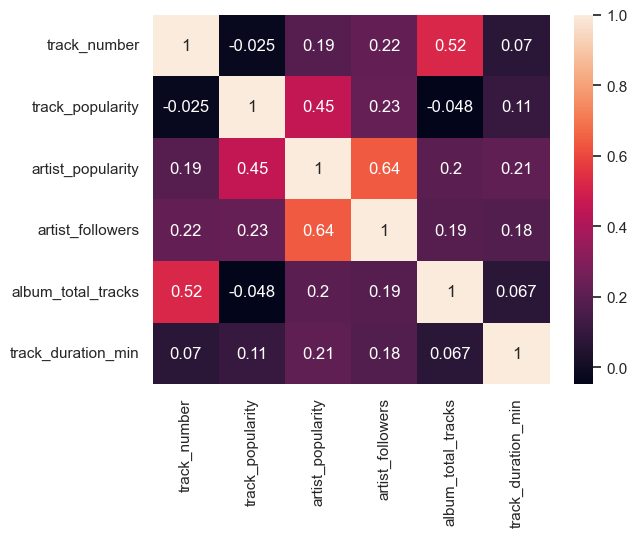

In [18]:
num = Spotify.select_dtypes(include=["float64","int64"])
sns.heatmap(num.corr(),annot=True)

#### 1️ Artist Popularity ↔ Artist Followers (0.64)
- This is the strongest positive correlation in the dataset.
- **Insight**: Artists with more followers tend to have higher popularity.

#### 2️ Track Popularity ↔ Artist Popularity (0.45)
-Tracks by popular artists tend to be more popular.
-**Insight**: Artist fame influences the success of individual tracks.

#### 3️ Track Number ↔ Album Total Tracks (0.52)
- High correlation because track numbers naturally increase with more tracks in an album.
- **Insight**: Longer albums naturally produce higher track numbering.
(Structural relationship, not business meaning.)

#### 4️ Artist Followers ↔ Track Popularity (0.23)
- Weak but positive correlation.
- **Insight**: Artists with more followers slightly help their track popularity, but track success also depends on other factors like genre, marketing, playlist placement, etc.

#### 5️ Artist Popularity ↔ Album Total Tracks (0.20)
- Weak correlation.
- **Insight**: Popular artists tend to release albums with slightly more tracks, but it’s not a very strong pattern

#### 6️ Track Duration ↔ Popularity (0.11)
- Almost no correlation.
- **Insight**: Track length does NOT influence popularity.

#### 7️ Track Number ↔ Track Popularity (–0.025)
- Essentially zero.
- **Insight**: A song’s position in an album has no impact on how popular it becomes.

**Distribution**

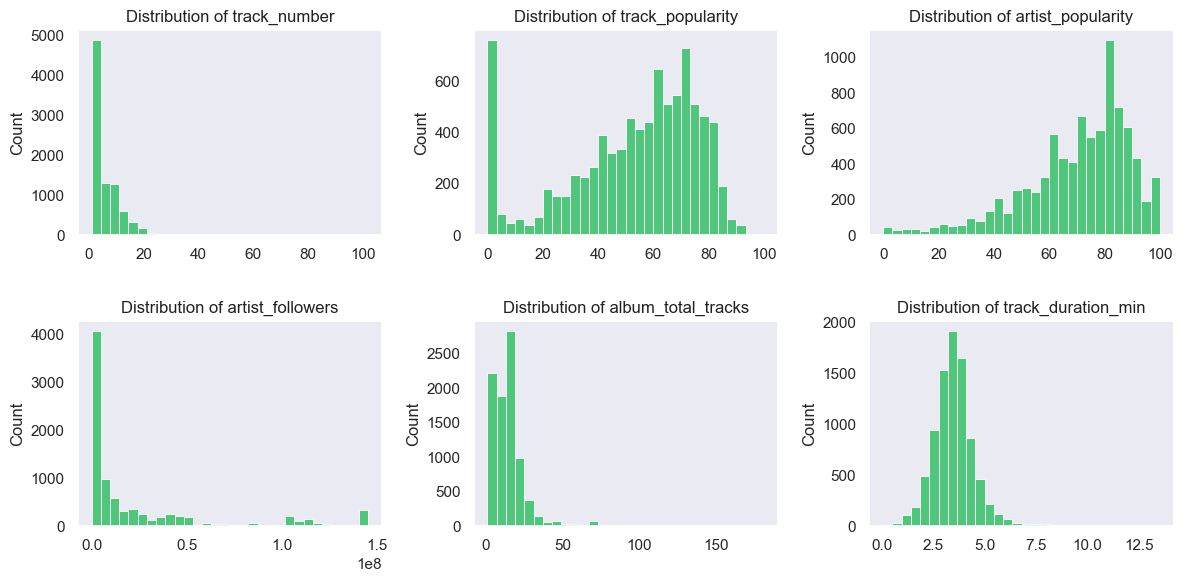

In [19]:
plt.figure(figsize=(12,6))
for x, col in enumerate(num):
    plt.subplot(2,3,x+1)
    sns.histplot(x = col,data=Spotify,bins=30,color = '#1db954' )
    plt.title(f"Distribution of {col}",color = "#212121")
    plt.xlabel(" ")
plt.tight_layout()    
plt.show()


## Insights:
The Dataset shows clear skewness across several key features. **Artist followers** and **track numbers** exhibit heavy right skew, suggesting that only a small group of artists dominate the follower counts and that long albums are relatively uncommon. In contrast, **track popularity** and **artist popularity** display more balanced distributions, indicating stable and consistent listener engagement across Spotify. **Track duration** follows a near-normal distribution centered around **3–5** minutes, which aligns with standard patterns observed in the global music industry

**Top Track**

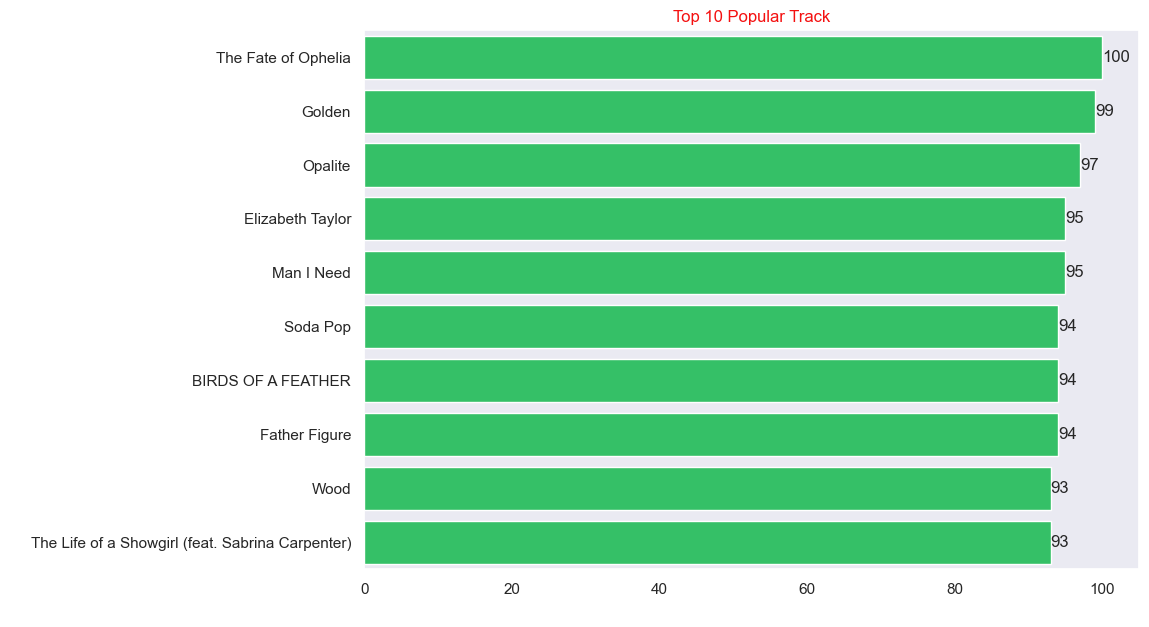

In [64]:
Top_Track = pd.read_sql_query("select Track_Name, Track_Popularity from Spotify order by Track_Popularity desc limit 10",engine)
plt.figure(figsize=(10,7))
ax=sns.barplot(x="Track_Popularity",y = "Track_Name",data=Top_Track, color="#1ed760")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Top 10 Popular Track",color = "#F41010")
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

## Insights:
The top 10 tracks on Spotify show exceptionally high popularity, with scores ranging from 93 to 100. “The Fate of Ophelia” stands out as the most popular track, achieving a perfect 100 score. Other songs like “Golden” (99) and “Opalite” (97) also perform extremely well, indicating widespread listener engagement.

All tracks in the top list are clustered in the 90+ popularity range, which reflects:
- Strong streaming performance
- High playlist reach
- Strong fan engagement
- Consistent listener preference

**Top Album**

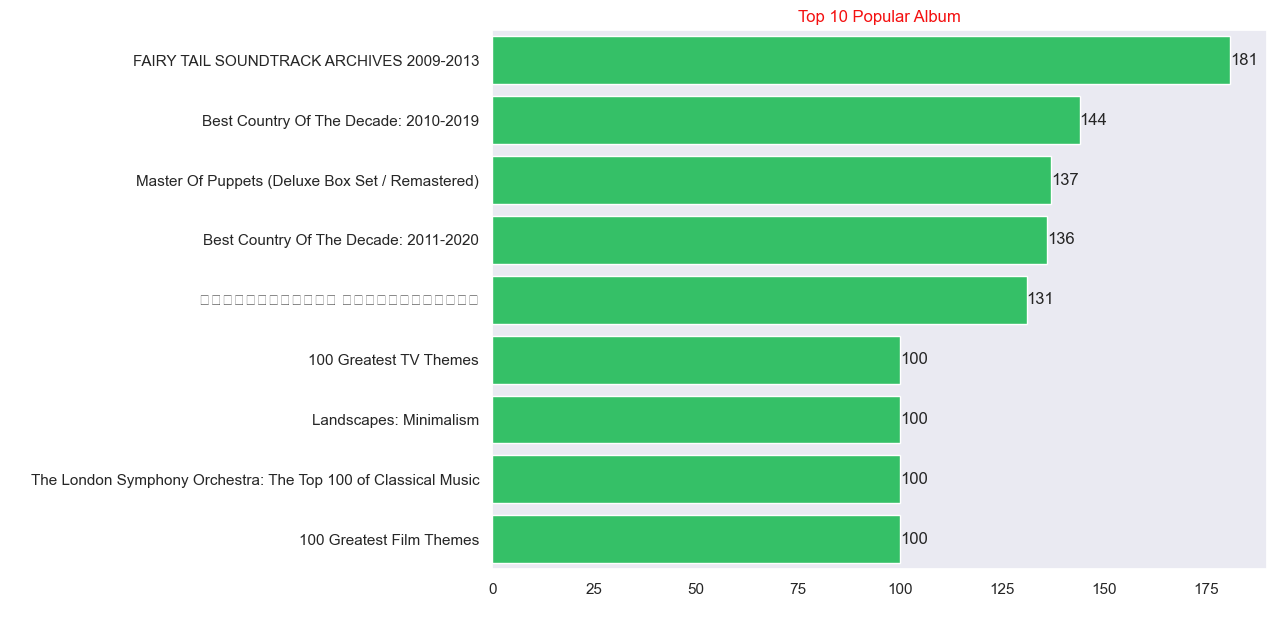

In [63]:
Album = pd.read_sql_query("Select Album_Name, Album_Total_Tracks  from Spotify" \
" order by Album_Total_Tracks desc limit 10", engine)
plt.figure(figsize=(10,7))
ax = sns.barplot(x="Album_Total_Tracks",y = "Album_Name",data=Album, color="#1ed760")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Top 10 Popular Album",color = "#F41010")
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

## Insights: 
The album “FAIRY TAIL SOUNDTRACK ARCHIVES 2009–2013” dominates the list with 181 tracks, far exceeding all other albums. Collections like “Best Country Of The Decade” (2010–2019 and 2011–2020 editions) and “Master of Puppets (Deluxe Box Set)” also appear prominently, each containing over 130 tracks, indicating extensive compilation or special edition releases.

Most of the remaining albums—including “100 Greatest TV Themes”, “Landscapes: Minimalism”, and “100 Greatest Film Themes”—contain exactly 100 tracks, reflecting curated collections or thematic anthologies rather than standard studio albums.

**Popular Artist_Generation**

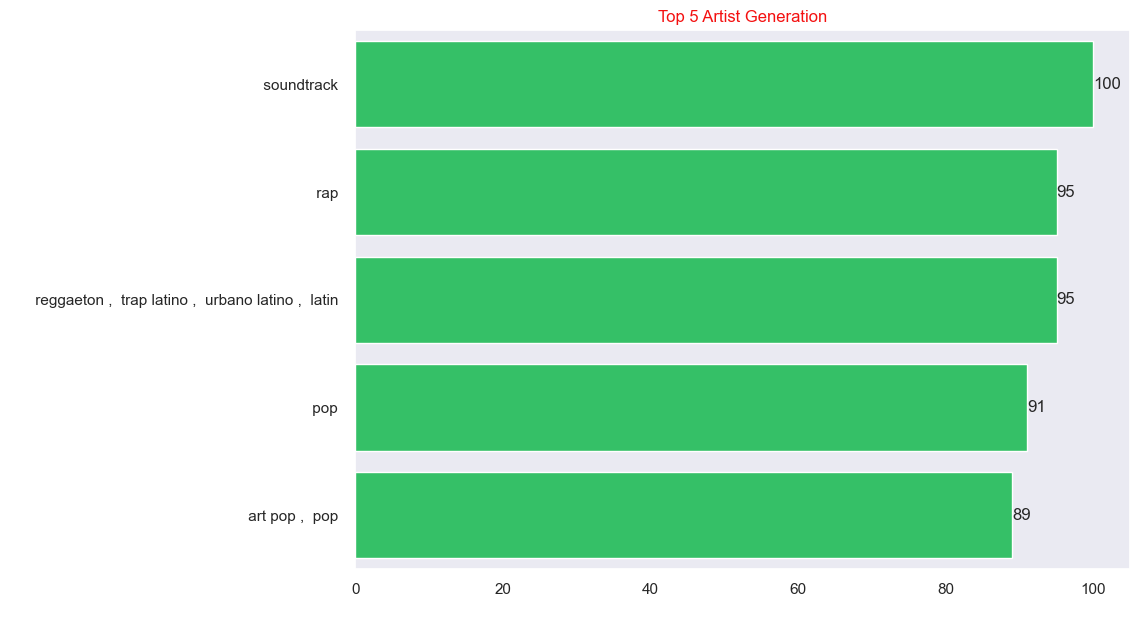

In [62]:
Top_Artist_Gen = pd.read_sql_query("select Artist_Genres,max(Artist_Popularity) as Artist_Popularity From " \
"Spotify group by Artist_genres order by  Artist_popularity desc limit 5;",engine)
plt.figure(figsize=(10,7))
ax = sns.barplot(y="Artist_Genres",x = "Artist_Popularity",data=Top_Artist_Gen, color="#1ed760")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Top 5 Artist Generation",color = "#F41010")
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

## Insights:
The most popular genre group is soundtrack, with a perfect popularity score of 100, indicating extremely strong global listener interest. Genres like rap and combined Latin styles (reggaeton, trap latino, urbano latino, latin) also achieve high popularity scores (95), showing broad engagement across diverse audiences. Pop-based genres remain consistently popular, appearing twice in the top 5 with popularity scores above 89. Overall, the chart highlights a mix of mainstream and culturally rich genres that attract widespread listeners.

**Album Type**

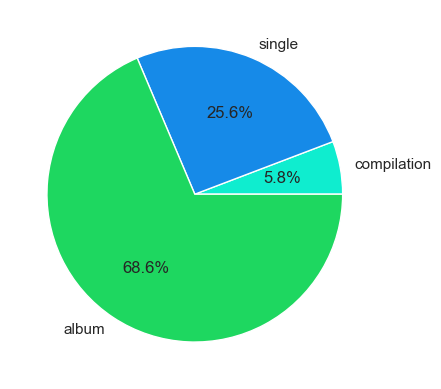

In [59]:
Album_Type = pd.read_sql_query("Select Album_Type, count(*) as Count from Spotify Group By Album_Type",engine)
plt.pie(Album_Type["Count"], labels=Album_Type["Album_Type"],autopct="%1.1F%%",
colors=["#0FEDCF","#168AE8","#1ED760"] )
plt.show()

## Insights:
The dataset is dominated by albums, which make up 68.6% of all releases. This indicates that most content on Spotify comes in the form of full-length albums rather than shorter formats. Singles account for 25.6%, reflecting the modern trend where artists frequently release individual tracks to maintain audience engagement. Compilation albums form only 5.8%, showing that curated or multi-artist collections are far less common

**Yearly Release Music**

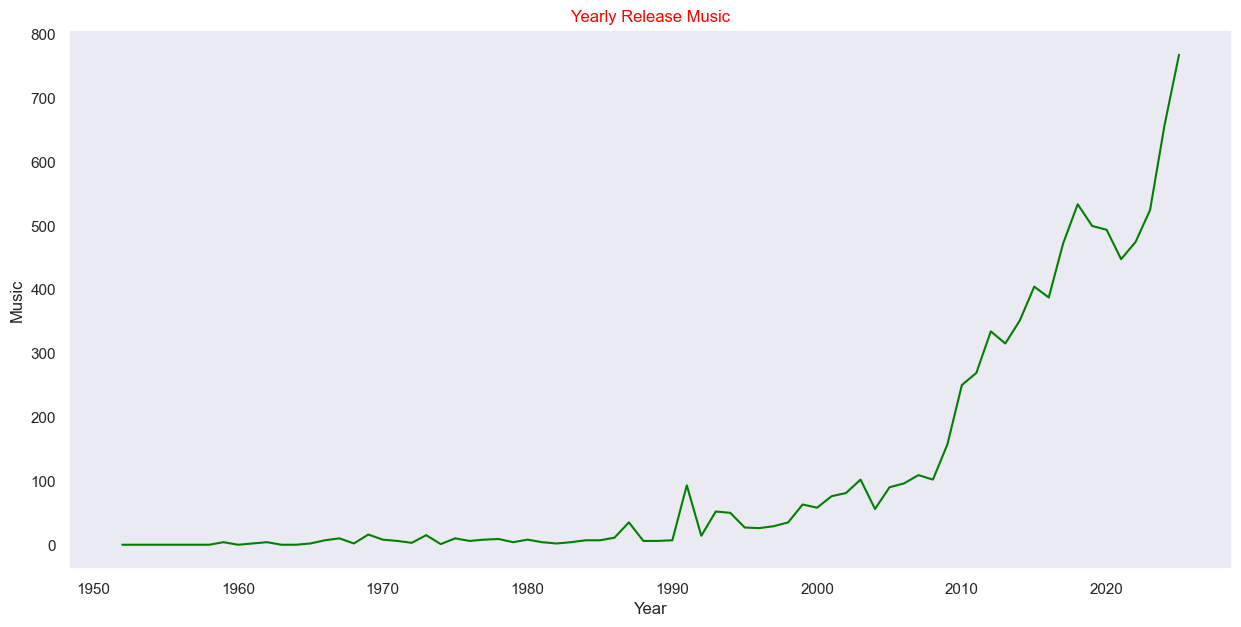

In [75]:
Yearly = pd.read_sql_query("select year(Album_release_Date) as Year, count(*) as Music from " \
"Spotify group by Year ;",engine)
plt.figure(figsize=(15,7))
sns.lineplot(x = "Year", y = "Music", data= Yearly, color = "Green")
plt.title("Yearly Release Music", color = "Red")
plt.show()

## Insights: 
Music releases remained very low and stable from the 1950s to the late 1980s, showing minimal growth during the early decades. A noticeable increase begins around the 1990s, followed by steady expansion through the 2000s. A major surge appears after 2010, with releases rising sharply — reflecting the impact of digital platforms, home studios, and global streaming adoption. The highest spike occurs in the 2020s, where yearly releases peak at nearly 800, indicating explosive growth in music production and distribution in the streaming era.

**Artist Ranking**

In [77]:
pd.read_sql_query("SELECT Artist_Name, MAX(Artist_Followers) AS " \
"Artist_Followers,RANK() OVER (ORDER BY MAX(Artist_Followers) DESC) " \
"AS Ranks FROM Spotify GROUP BY Artist_Name limit 10",engine)

,Artist_Name,Artist_Followers,Ranks
0,Taylor Swift,145542136.0,1
1,Ed Sheeran,122802777.0,2
2,Billie Eilish,118797451.0,3
3,The Weeknd,113039308.0,4
4,Ariana Grande,107418606.0,5
5,Eminem,104584370.0,6
6,Drake,103126025.0,7
7,Bad Bunny,102610644.0,8
8,Justin Bieber,85050158.0,9
9,BTS,81197976.0,10


## Insights:
**✔** Taylor Swift holds the No. 1 position with an extraordinary 145M+ followers, making her the most-followed and globally dominant artist on Spotify.
**✔** Ed Sheeran (122M+) and Billie Eilish (118M+) secure 2nd and 3rd spots, showing extremely strong fanbases and international presence.
**✔** Artists like The Weeknd, Ariana Grande, Eminem, Drake, and Bad Bunny form the mid-top tier, each exceeding 100M followers, indicating strong global influence and streaming popularity.
**✔** Justin Bieber and BTS complete the top 10 with massive follower counts, reflecting their sustained popularity across diverse audiences.